In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


1. What does the distribution of petal lengths look like?

Text(0.5, 0, 'Petal Length')

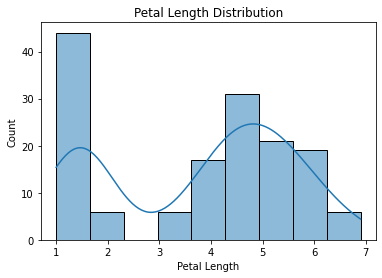

In [3]:
sns.histplot(iris.petal_length, kde=True)
plt.title('Petal Length Distribution')
plt.xlabel('Petal Length')

2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

Text(6.799999999999997, 0.5, 'Petal Width')

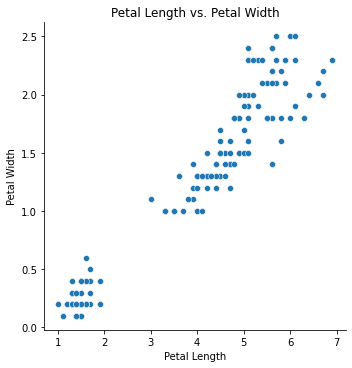

In [4]:
sns.relplot(x='petal_length', y='petal_width', data=iris)
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

Text(32.05291666666666, 0.5, 'Sepal Width')

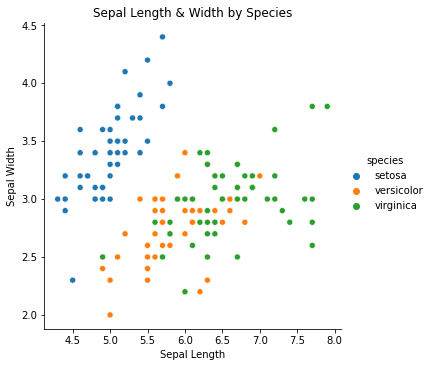

In [5]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.title('Sepal Length & Width by Species')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

4. Which features would be best used to predict species?

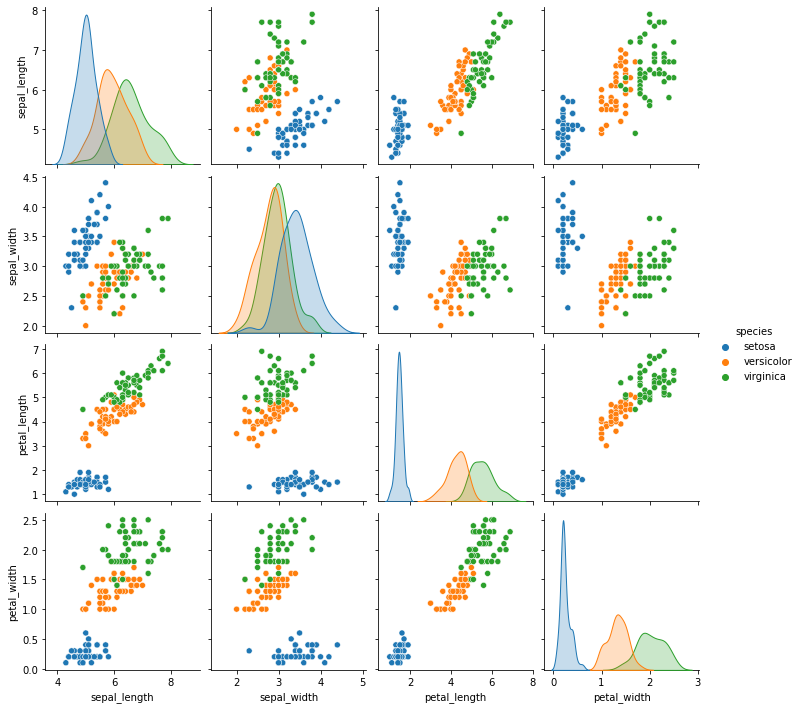

In [6]:
sns.pairplot(iris, hue='species')
# Petal width and length look like the best features to predict species.

1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice? 

In [7]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [8]:
anscombe.groupby('dataset').agg(['min', 'median', 'mean', 'std', 'max'])
# The datasets have the same mean and standard deviation. 

x                                 y                             \
         min median mean       std   max   min median      mean       std   
dataset                                                                     
I        4.0    9.0  9.0  3.316625  14.0  4.26   7.58  7.500909  2.031568   
II       4.0    9.0  9.0  3.316625  14.0  3.10   8.14  7.500909  2.031657   
III      4.0    9.0  9.0  3.316625  14.0  5.39   7.11  7.500000  2.030424   
IV       8.0    8.0  9.0  3.316625  19.0  5.25   7.04  7.500909  2.030579   

                
           max  
dataset         
I        10.84  
II        9.26  
III      12.74  
IV       12.50

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

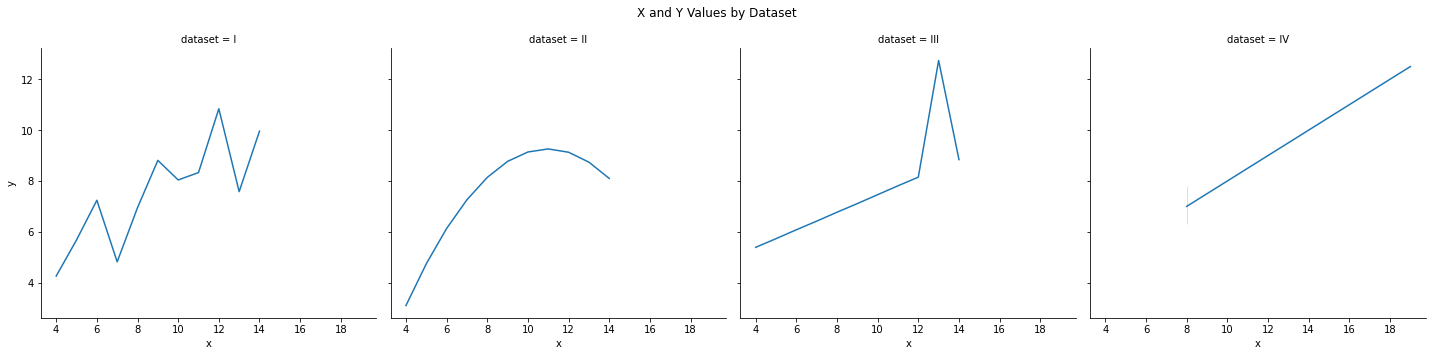

In [9]:
sns.relplot(x='x', y='y', data= anscombe, col='dataset', kind='line')
plt.suptitle('X and Y Values by Dataset')
plt.tight_layout()

2. Load the InsectSprays dataset and read it's documentation. 

In [3]:
from pydataset import data
insectsprays = data('InsectSprays')
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [11]:
insectsprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


Create a boxplot that shows the effectiveness of the different insect sprays.

Text(0, 0.5, 'Spray')

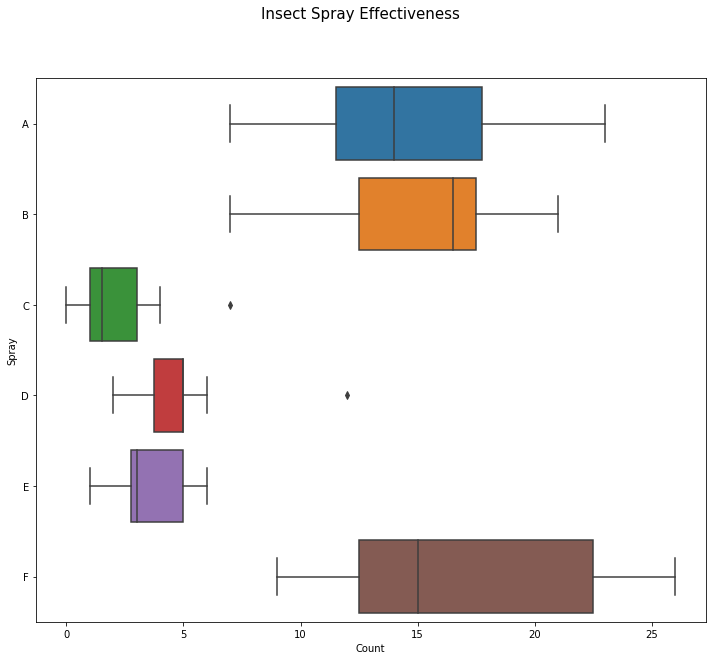

In [20]:
plt.figure(figsize=(12,10))
plt.suptitle('Insect Spray Effectiveness', fontsize=15)
sns.boxplot(data=insectsprays, x='count', y='spray')
plt.xlabel('Count')
plt.ylabel('Spray')

3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [22]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


- Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [24]:
swiss['is_catholic'] = swiss.Catholic > 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


- Does whether or not a province is Catholic influence fertility?

Text(0.5, 0, 'Province is Catholic')

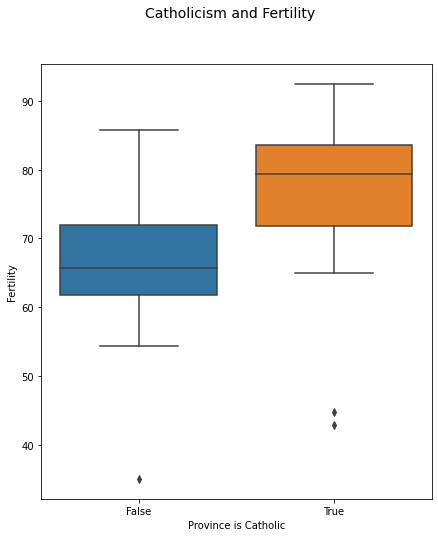

In [34]:
plt.figure(figsize=(7,8))
sns.boxplot(x='is_catholic', y='Fertility', data=swiss)
plt.suptitle('Catholicism and Fertility', fontsize=14)
plt.xlabel('Province is Catholic')

- What measure correlates most strongly with fertility?

In [56]:
swiss.corr()
# Education seems to be the measure that correlates most strongly. It's a negative correlation. 

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


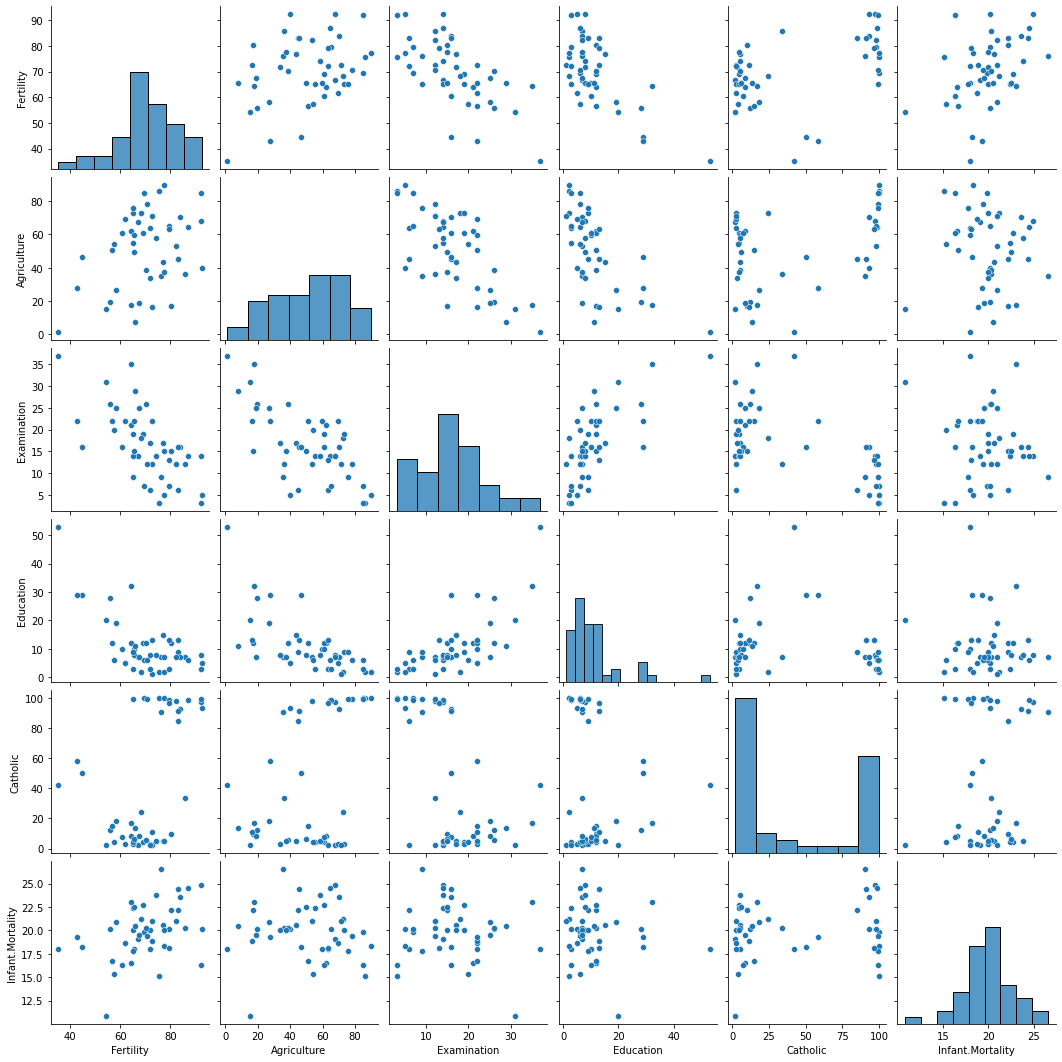

In [73]:
sns.pairplot(data=swiss.iloc[:, :-1])

4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [60]:
from env import host, user, password, get_db_url
chipotle = pd.read_sql('SELECT * FROM orders', get_db_url('chipotle'))
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [61]:
chipotle['item_price'] = chipotle.item_price.str.strip('$')
chipotle['item_price'] = pd.to_numeric(chipotle.item_price)
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [67]:
four_most_popular = chipotle.groupby('item_name').quantity.sum().sort_values(ascending=False).head(4)
four_most_popular

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [68]:
top_revenues = chipotle[chipotle.item_name.isin(four_most_popular.index)].groupby('item_name').item_price.sum()
top_revenues = top_revenues.sort_values(ascending=False).reset_index()
top_revenues

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


Text(0, 0.5, 'Item')

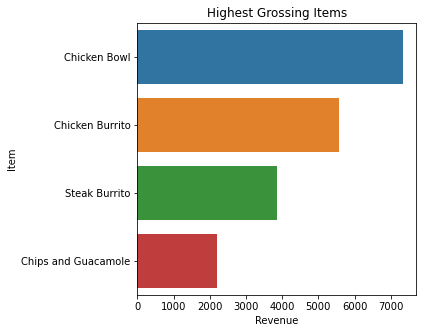

In [77]:
plt.figure(figsize=(5, 5))
plt.title('Highest Grossing Items')
sns.barplot(x='item_price', y='item_name', data=top_revenues)
plt.xlabel('Revenue')
plt.ylabel('Item')

5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [4]:
sleepstudy = data('sleepstudy')
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [5]:
sleepstudy['Subject'] = 'Subject ' + sleepstudy.Subject.astype(str)
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,Subject 308
2,258.7047,1,Subject 308
3,250.8006,2,Subject 308
4,321.4398,3,Subject 308
5,356.8519,4,Subject 308
...,...,...,...
176,329.6076,5,Subject 372
177,334.4818,6,Subject 372
178,343.2199,7,Subject 372
179,369.1417,8,Subject 372


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

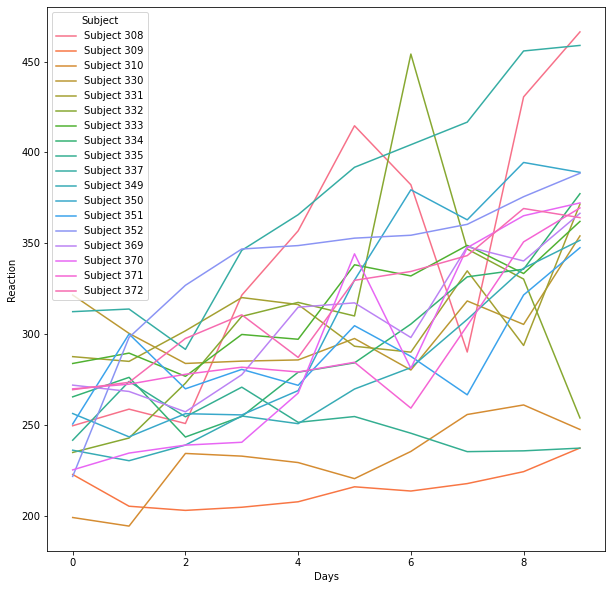

In [8]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Days", y="Reaction", hue="Subject", estimator="mean", data=sleepstudy)